In [1]:
import rasterio
import numpy as np

# Path to the raster file
raster_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\output\testest2.tif'

# Open the raster file
with rasterio.open(raster_path) as src:
    # Read the raster data
    raster_data = src.read(1)  # Read the first band

    # Compute the minimum and maximum values
    min_value = np.min(raster_data)
    max_value = np.max(raster_data)

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

Minimum value: -2147483648
Maximum value: 7791


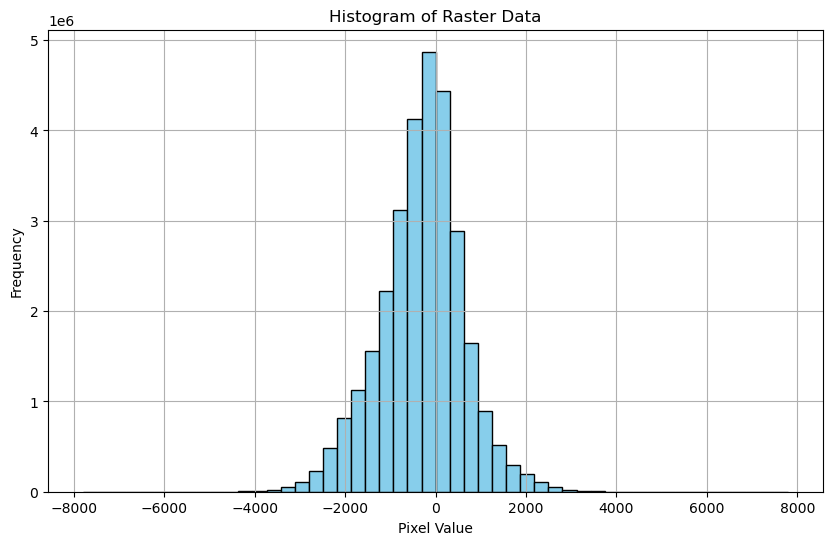

In [3]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Path to the raster file
raster_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\output\testest2.tif'

# Open the raster file
with rasterio.open(raster_path) as src:
    # Read the raster data
    raster_data = src.read(1)  # Read the first band

    # Flatten the array and remove NoData values (if present)
    raster_data_flat = raster_data.flatten()
    no_data = src.nodata
    if no_data is not None:
        raster_data_flat = raster_data_flat[raster_data_flat != no_data]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(raster_data_flat, bins=50, edgecolor='black', color='skyblue')
plt.title('Histogram of Raster Data')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [4]:
import rasterio
import numpy as np

# Path to the raster file
raster_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\output\testest2.tif'

# Open the raster file
with rasterio.open(raster_path) as src:
    # Read the raster data
    raster_data = src.read(1)  # Read the first band

    # Flatten the array and remove NoData values (if present)
    raster_data_flat = raster_data.flatten()
    no_data = src.nodata
    if no_data is not None:
        raster_data_flat = raster_data_flat[raster_data_flat != no_data]

# Calculate summary statistics
min_value = np.min(raster_data_flat)
max_value = np.max(raster_data_flat)
mean_value = np.mean(raster_data_flat)
std_dev = np.std(raster_data_flat)

# Print the summary statistics
print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")
print(f"Mean Value: {mean_value}")
print(f"Standard Deviation: {std_dev}")


Minimum Value: -7789
Maximum Value: 7791
Mean Value: -306.6614652174863
Standard Deviation: 919.0510624245943


In [6]:
import rasterio
import numpy as np

# Paths to the raster files
raster_path1 = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\image1.tif'
raster_path2 = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\image2.tif'
output_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\output\percentage_change.tif'

# Open the first raster file
with rasterio.open(raster_path1) as src1:
    data1 = src1.read(1)  # Read the first band
    profile1 = src1.profile

# Open the second raster file
with rasterio.open(raster_path2) as src2:
    data2 = src2.read(1)  # Read the first band

# Ensure both rasters have the same dimensions and projection
if data1.shape != data2.shape:
    raise ValueError("Rasters do not have the same dimensions.")
if src1.crs != src2.crs or src1.transform != src2.transform:
    raise ValueError("Rasters do not have the same CRS or transform.")

# Calculate percentage change
# Handle division by zero and invalid values
data1_safe = np.where(data1 == 0, np.nan, data1)  # Avoid division by zero
percentage_change = ((data2 - data1_safe) / data1_safe) * 100

# Save the result to a new raster file
with rasterio.open(
    output_path, 'w',
    driver='GTiff',
    height=percentage_change.shape[0],
    width=percentage_change.shape[1],
    count=1,
    dtype='float32',  # Use float32 to handle percentage values
    crs=src1.crs,
    transform=src1.transform
) as dst:
    dst.write(percentage_change, 1)

print(f"Percentage change raster saved at {output_path}")


Percentage change raster saved at C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\output\percentage_change.tif


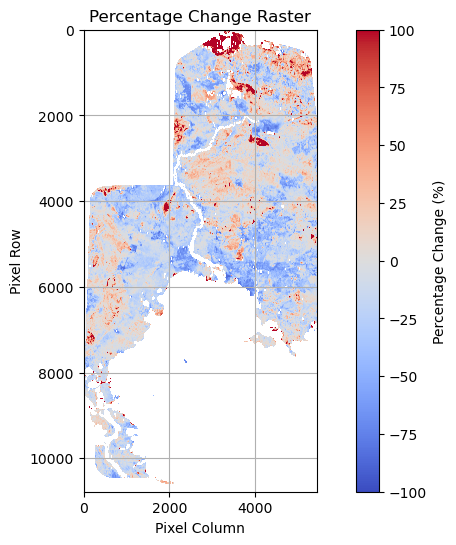

In [7]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Path to the percentage change raster file
raster_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\output\percentage_change.tif'

# Open the raster file
with rasterio.open(raster_path) as src:
    # Read the raster data
    raster_data = src.read(1)  # Read the first band
    nodata = src.nodata

# Mask NoData values for visualization
if nodata is not None:
    raster_data = np.ma.masked_equal(raster_data, nodata)

# Plot the raster data
plt.figure(figsize=(10, 6))
plt.title('Percentage Change Raster')
plt.imshow(raster_data, cmap='coolwarm', vmin=-100, vmax=100)  # Adjust vmin and vmax based on your data range
plt.colorbar(label='Percentage Change (%)')
plt.xlabel('Pixel Column')
plt.ylabel('Pixel Row')
plt.grid(True)
plt.show()


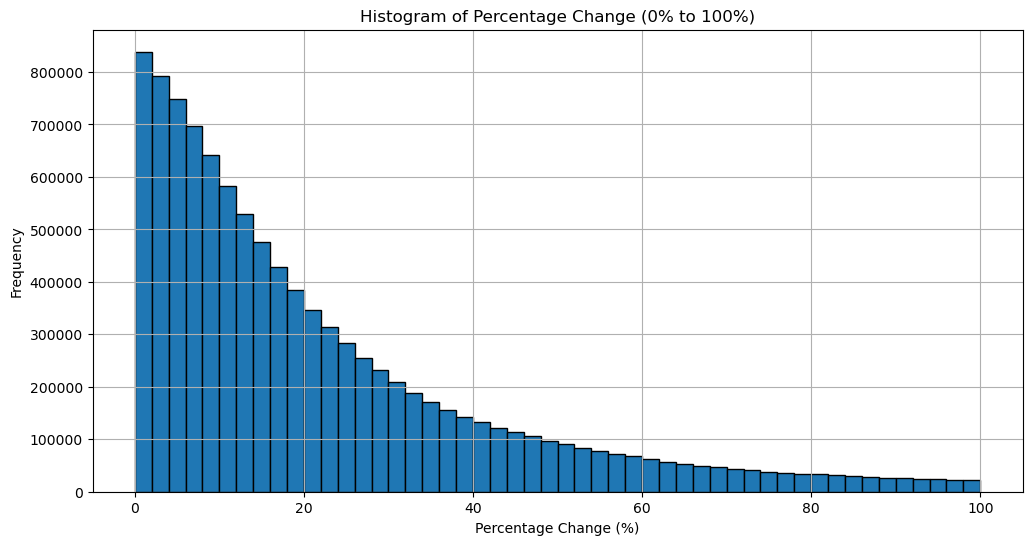

In [14]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Path to the percentage change raster file
raster_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\output\percentage_change.tif'

# Open the raster file
with rasterio.open(raster_path) as src:
    # Read the raster data
    raster_data = src.read(1)  # Read the first band
    nodata = src.nodata

# Mask NoData values
if nodata is not None:
    raster_data = np.ma.masked_equal(raster_data, nodata)

# Filter out values outside the range 0% to 100%
filtered_data = np.ma.masked_outside(raster_data, 0, 100)

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(filtered_data.compressed(), bins=50, range=(0, 100), edgecolor='black')
plt.title('Histogram of Percentage Change (0% to 100%)')
plt.xlabel('Percentage Change (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


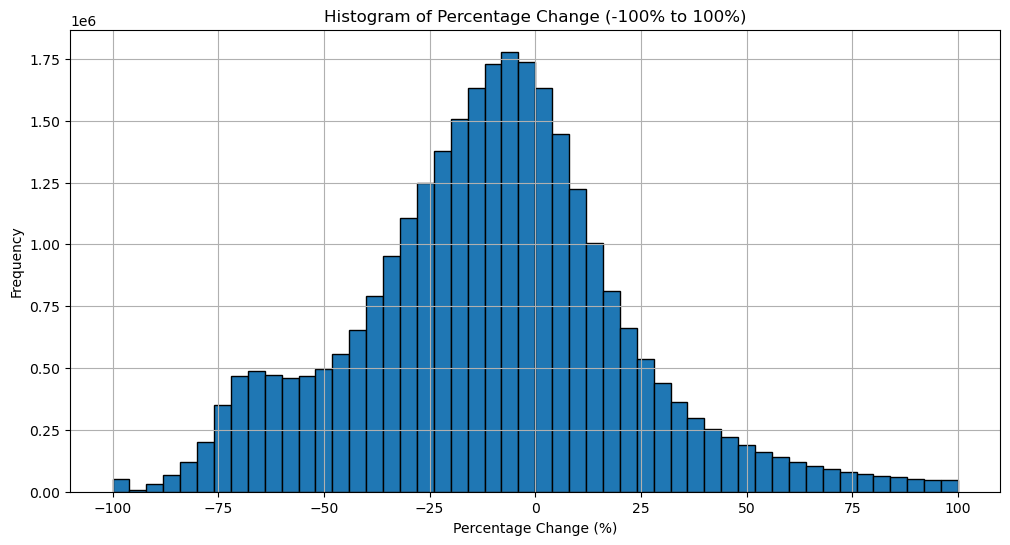

In [15]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Path to the percentage change raster file
raster_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\output\percentage_change.tif'

# Open the raster file
with rasterio.open(raster_path) as src:
    # Read the raster data
    raster_data = src.read(1)  # Read the first band
    nodata = src.nodata

# Mask NoData values
if nodata is not None:
    raster_data = np.ma.masked_equal(raster_data, nodata)

# Filter out values outside the range -100% to 100%
filtered_data = np.ma.masked_outside(raster_data, -100, 100)

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(filtered_data.compressed(), bins=50, range=(-100, 100), edgecolor='black')
plt.title('Histogram of Percentage Change (-100% to 100%)')
plt.xlabel('Percentage Change (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [19]:
import rasterio
import numpy as np

# Paths to the input and output raster files
raster_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\output\percentage_change.tif'
output_classified_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\output\classified_raster_20_classes.tif'

# Open the raster file
with rasterio.open(raster_path) as src:
    # Read the raster data
    raster_data = src.read(1)  # Read the first band
    nodata = src.nodata
    transform = src.transform
    crs = src.crs

# Mask NoData values
if nodata is not None:
    raster_data = np.ma.masked_equal(raster_data, nodata)

# Define class boundaries
num_classes = 20
class_boundaries = np.linspace(-100, 100, num_classes + 1)

# Classify the data
classified_data = np.digitize(raster_data, bins=class_boundaries, right=True) - 1  # -1 for zero-based index

# Handle NoData values in the classified data
classified_data = np.ma.masked_where(np.ma.getmask(raster_data), classified_data)

# Save the classified raster
with rasterio.open(
    output_classified_path, 'w',
    driver='GTiff',
    height=classified_data.shape[0],
    width=classified_data.shape[1],
    count=1,
    dtype='uint8',  # Use uint8 for class indices
    crs=crs,
    transform=transform
) as dst:
    # Write the classified data, filling masked values with NoData
    dst.write(classified_data.filled(nodata), 1)

print(f"Classified raster saved at {output_classified_path}")


Classified raster saved at C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\output\classified_raster_20_classes.tif


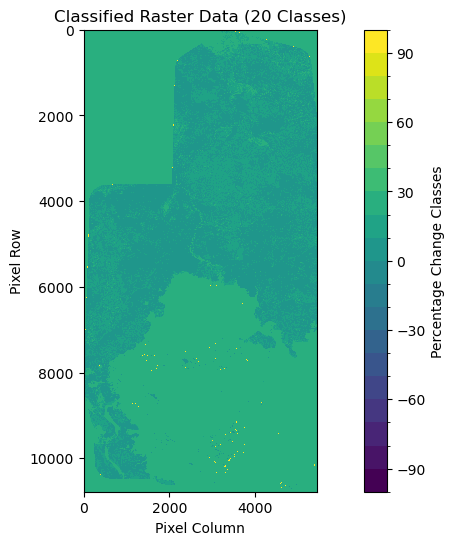

In [20]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

# Path to the classified raster file
classified_raster_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\output\classified_raster_20_classes.tif'

# Open the classified raster file
with rasterio.open(classified_raster_path) as src:
    # Read the classified raster data
    classified_data = src.read(1)  # Read the first band
    nodata = src.nodata
    transform = src.transform
    crs = src.crs

# Mask NoData values
if nodata is not None:
    classified_data = np.ma.masked_equal(classified_data, nodata)

# Define class boundaries for colormap
num_classes = 20
class_boundaries = np.linspace(-100, 100, num_classes + 1)

# Create a colormap and normalization
cmap = plt.get_cmap('viridis', num_classes)  # Use 'viridis' colormap with 'num_classes' colors
norm = BoundaryNorm(class_boundaries, cmap.N)

# Plot the classified raster data
plt.figure(figsize=(12, 6))
# Use 'masked' values for visualization
plt.imshow(classified_data, cmap=cmap, norm=norm, interpolation='none')
plt.colorbar(label='Percentage Change Classes')
plt.title('Classified Raster Data (20 Classes)')
plt.xlabel('Pixel Column')
plt.ylabel('Pixel Row')
plt.grid(False)
plt.show()


In [21]:
import rasterio
import numpy as np

# Paths to the two input raster files
raster_path1 = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\image1.tif'
raster_path2 = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\image2.tif'
output_percentage_change_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\output\masked_percentage_change_no_lake.tif'

# Open the raster files
with rasterio.open(raster_path1) as src1, rasterio.open(raster_path2) as src2:
    # Read the data from each raster
    data1 = src1.read(1)  # First band of raster 1
    data2 = src2.read(1)  # First band of raster 2
    
    # Get metadata like transform and CRS
    transform = src1.transform
    crs = src1.crs
    nodata1 = src1.nodata
    nodata2 = src2.nodata

# Define thresholds to identify water areas or invalid areas
# Here, we assume TSDM values below a certain threshold indicate water (modify as needed)
water_threshold = 10  # You can change this based on your data

# Create a mask for water areas or very low TSDM values
lake_mask = (data1 < water_threshold) | (data2 < water_threshold)

# Also, mask NoData values from both rasters
combined_mask = (data1 == nodata1) | (data2 == nodata2) | lake_mask  # Combine NoData and water mask

# Mask NoData values and water areas from the calculation
data1_masked = np.ma.masked_where(combined_mask, data1)
data2_masked = np.ma.masked_where(combined_mask, data2)

# Calculate the percentage change where data is valid
percentage_change = np.where(data1_masked != 0, ((data2_masked - data1_masked) / data1_masked) * 100, np.nan)

# Save the percentage change raster with the mask applied
with rasterio.open(
    output_percentage_change_path, 'w',
    driver='GTiff',
    height=percentage_change.shape[0],
    width=percentage_change.shape[1],
    count=1,
    dtype='float32',  # Save as float to handle negative values and NaNs
    crs=crs,
    transform=transform
) as dst:
    dst.write(np.ma.filled(percentage_change, np.nan), 1)  # Save NaNs for masked areas

print(f"Masked percentage change raster saved at {output_percentage_change_path}")


Masked percentage change raster saved at C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\output\masked_percentage_change_no_lake.tif


Minimum value in the raster: 0.0%
Maximum value in the raster: 119134.546875%


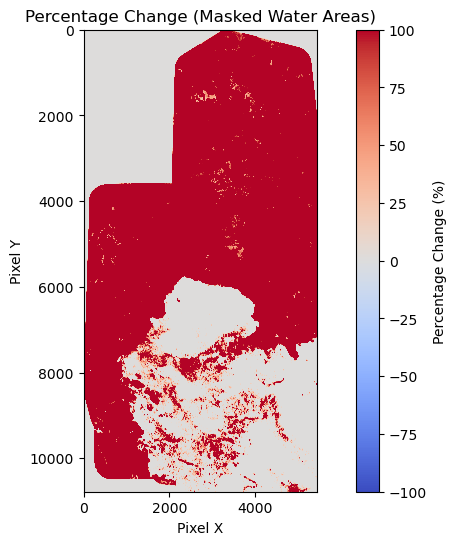

AttributeError: 'numpy.ndarray' object has no attribute 'compressed'

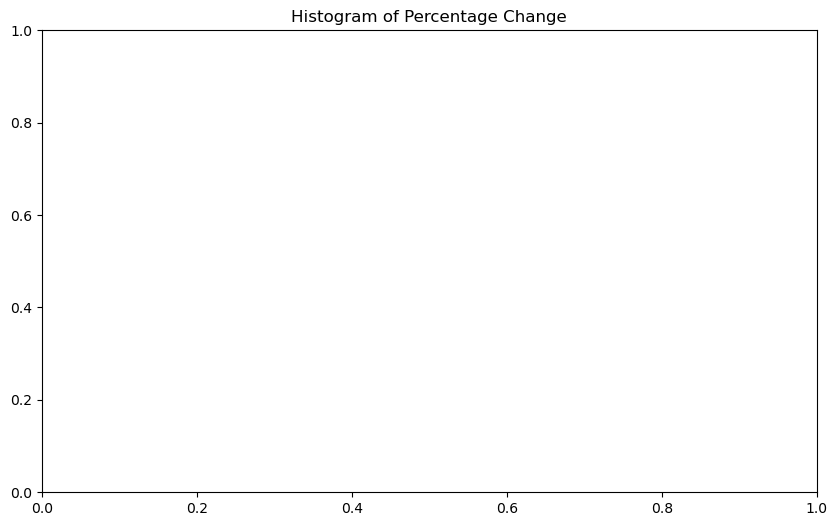

In [22]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Path to the percentage change raster file
percentage_change_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\output\masked_percentage_change_no_lake.tif'

# Open the percentage change raster file
with rasterio.open(percentage_change_path) as src:
    percentage_change = src.read(1)  # Read the first band (percentage change)
    nodata = src.nodata

# Mask NoData values for visualization
if nodata is not None:
    percentage_change = np.ma.masked_equal(percentage_change, nodata)

# Calculate the min and max values for the raster
min_value = np.min(percentage_change)
max_value = np.max(percentage_change)

print(f"Minimum value in the raster: {min_value}%")
print(f"Maximum value in the raster: {max_value}%")

# Plot the percentage change raster
plt.figure(figsize=(10, 6))
plt.title('Percentage Change (Masked Water Areas)')
plt.imshow(percentage_change, cmap='coolwarm', norm=Normalize(vmin=-100, vmax=100))  # Adjust color range from -100% to 100%
plt.colorbar(label='Percentage Change (%)')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()

# Plot histogram of percentage change values
plt.figure(figsize=(10, 6))
plt.title('Histogram of Percentage Change')
plt.hist(percentage_change.compressed(), bins=50, range=(-100, 100), color='skyblue', edgecolor='black')
plt.xlabel('Percentage Change (%)')
plt.ylabel('Frequency')
plt.show()


Minimum value in the raster: 0.0%
Maximum value in the raster: 119134.546875%


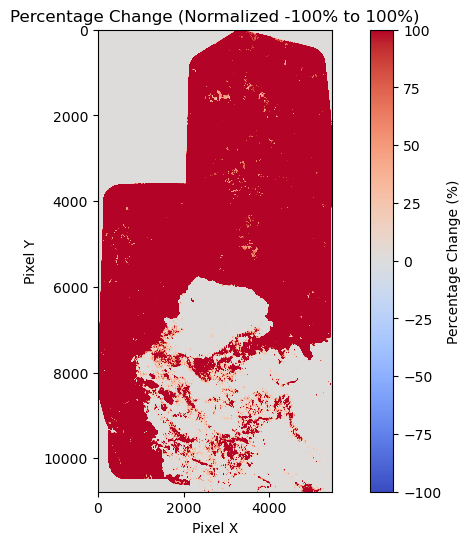

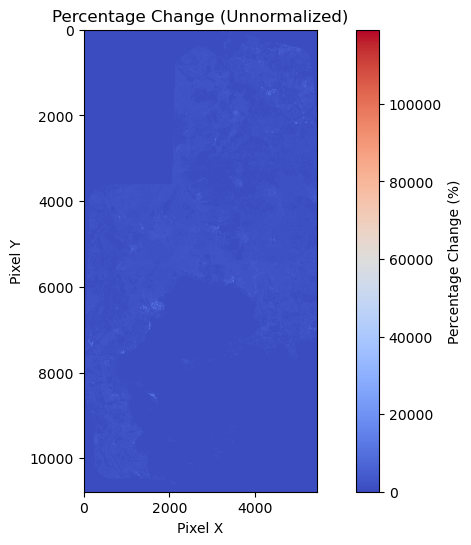

AttributeError: 'numpy.ndarray' object has no attribute 'compressed'

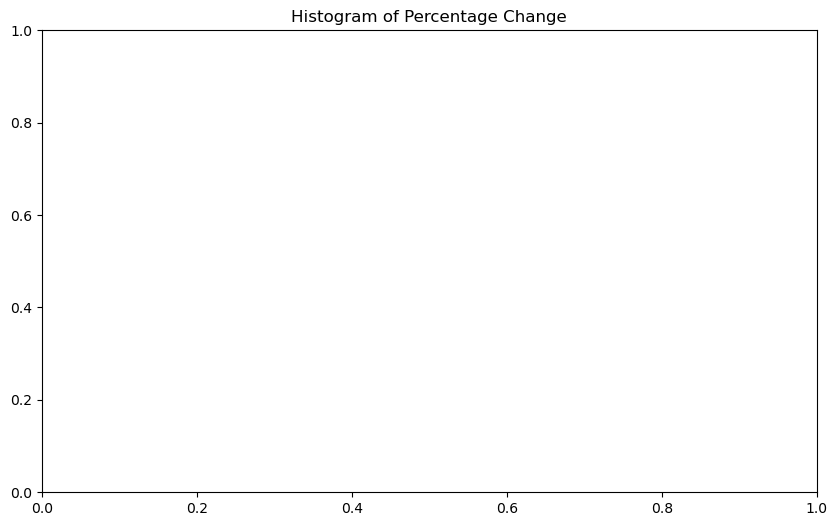

In [23]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Path to the percentage change raster file
percentage_change_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\output\masked_percentage_change_no_lake.tif'

# Open the percentage change raster file
with rasterio.open(percentage_change_path) as src:
    percentage_change = src.read(1)  # Read the first band (percentage change)
    nodata = src.nodata

# Mask NoData values for visualization
if nodata is not None:
    percentage_change = np.ma.masked_equal(percentage_change, nodata)

# Calculate the min and max values for the raster
min_value = np.min(percentage_change)
max_value = np.max(percentage_change)

print(f"Minimum value in the raster: {min_value}%")
print(f"Maximum value in the raster: {max_value}%")

# Plot the percentage change raster with normalization (-100% to 100%)
plt.figure(figsize=(10, 6))
plt.title('Percentage Change (Normalized -100% to 100%)')
plt.imshow(percentage_change, cmap='coolwarm', norm=Normalize(vmin=-100, vmax=100))  # Normalized color range
plt.colorbar(label='Percentage Change (%)')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()

# Plot the percentage change raster without normalization (using full range)
plt.figure(figsize=(10, 6))
plt.title('Percentage Change (Unnormalized)')
plt.imshow(percentage_change, cmap='coolwarm')  # No normalization applied
plt.colorbar(label='Percentage Change (%)')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()

# Plot histogram of percentage change values
plt.figure(figsize=(10, 6))
plt.title('Histogram of Percentage Change')
plt.hist(percentage_change.compressed(), bins=50, range=(-100, 100), color='skyblue', edgecolor='black')  # Focus on range -100% to 100%
plt.xlabel('Percentage Change (%)')
plt.ylabel('Frequency')
plt.show()

# Plot histogram of full range of percentage change values (without focusing on -100 to 100%)
plt.figure(figsize=(10, 6))
plt.title('Histogram of Percentage Change (Full Range)')
plt.hist(percentage_change.compressed(), bins=50, color='skyblue', edgecolor='black')  # Full range
plt.xlabel('Percentage Change (%)')
plt.ylabel('Frequency')
plt.show()


In [25]:
import rasterio
import numpy as np

# Path to the percentage change raster file
input_raster_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\output\masked_percentage_change_no_lake.tif'
output_normalized_raster_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\output\normalized_percentage_change.tif'

# Open the raster file
with rasterio.open(input_raster_path) as src:
    percentage_change = src.read(1)  # Read the first band (percentage change)
    nodata = src.nodata
    transform = src.transform
    crs = src.crs

# Mask NoData values
if nodata is not None:
    percentage_change = np.ma.masked_equal(percentage_change, nodata)

# Normalize the percentage change raster to -100% to 100%
min_val = -100
max_val = 100

# Apply normalization
normalized_data = np.clip(percentage_change, min_val, max_val)

# If the data is a masked array, fill the NoData value, otherwise, leave it as is
if np.ma.is_masked(normalized_data):
    normalized_data = normalized_data.filled(nodata)  # Replace mask with NoData value

# Save the normalized raster to a new file
with rasterio.open(
    output_normalized_raster_path, 'w',
    driver='GTiff',
    height=normalized_data.shape[0],
    width=normalized_data.shape[1],
    count=1,
    dtype='float32',
    crs=crs,
    transform=transform
) as dst:
    dst.write(normalized_data, 1)  # Write the normalized data

print(f"Normalized raster saved at {output_normalized_raster_path}")


Normalized raster saved at C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\output\normalized_percentage_change.tif


Minimum value in the raster: 0.0
Maximum value in the raster: 100.0


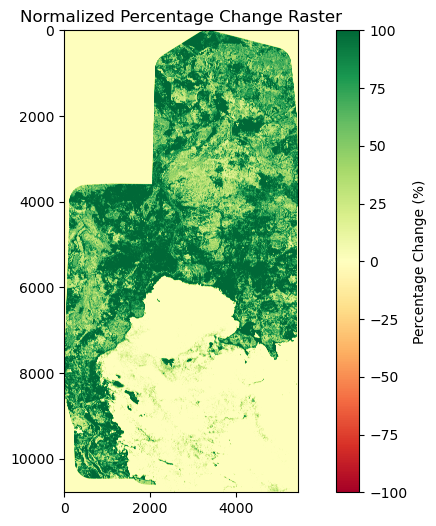

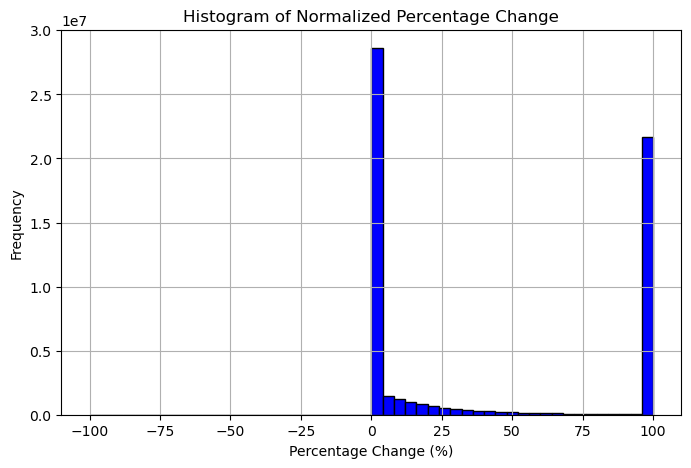

In [27]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np

# Path to the normalized raster file
normalized_raster_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\output\normalized_percentage_change.tif'

# Open the normalized raster file
with rasterio.open(normalized_raster_path) as src:
    normalized_data = src.read(1)  # Read the first band
    nodata = src.nodata

# Mask NoData values if necessary
if nodata is not None:
    normalized_data = np.ma.masked_equal(normalized_data, nodata)

# Calculate min and max
min_val = np.min(normalized_data)
max_val = np.max(normalized_data)

print(f"Minimum value in the raster: {min_val}")
print(f"Maximum value in the raster: {max_val}")

# Plot the raster data
plt.figure(figsize=(10, 6))
plt.imshow(normalized_data, cmap='RdYlGn', vmin=-100, vmax=100)
plt.colorbar(label='Percentage Change (%)')
plt.title('Normalized Percentage Change Raster')
plt.show()

# Plot the histogram
plt.figure(figsize=(8, 5))
if isinstance(normalized_data, np.ma.MaskedArray):
    data_to_plot = normalized_data.compressed()  # Use compressed if it's a masked array
else:
    data_to_plot = normalized_data.flatten()  # Flatten for normal arrays

plt.hist(data_to_plot, bins=50, color='blue', edgecolor='black', range=(-100, 100))
plt.title('Histogram of Normalized Percentage Change')
plt.xlabel('Percentage Change (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Percentage change raster saved at C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\output\perc_change.tif
Normalized percentage change raster saved at C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\output\norm_percentage_change.tif
Minimum value in the normalized raster: 0.0
Maximum value in the normalized raster: 100.0


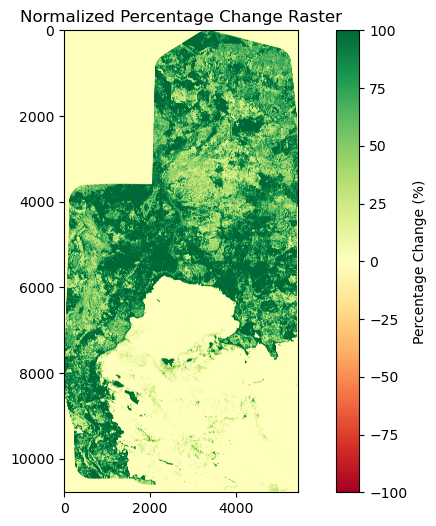

AttributeError: 'numpy.ndarray' object has no attribute 'compressed'

<Figure size 800x500 with 0 Axes>

In [29]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Paths to the raster files
image1_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\image1.tif'
image2_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\image2.tif'
output_change_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\output\perc_change.tif'
output_normalized_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\output\norm_percentage_change.tif'

# Read the rasters
with rasterio.open(image1_path) as src1, rasterio.open(image2_path) as src2:
    data1 = src1.read(1)  # Read the first band
    data2 = src2.read(1)  # Read the first band
    nodata1 = src1.nodata
    nodata2 = src2.nodata
    transform = src1.transform
    crs = src1.crs

# Mask NoData values
if nodata1 is not None:
    data1 = np.ma.masked_equal(data1, nodata1)
if nodata2 is not None:
    data2 = np.ma.masked_equal(data2, nodata2)

# Calculate percentage change
percentage_change = np.where(data1 != 0, ((data2 - data1) / data1) * 100, np.nan)

# Normalize to -100% to +100%
normalized_data = np.clip(percentage_change, -100, 100)

# Save percentage change raster
with rasterio.open(
    output_change_path, 'w',
    driver='GTiff',
    height=percentage_change.shape[0],
    width=percentage_change.shape[1],
    count=1,
    dtype='float32',
    crs=crs,
    transform=transform
) as dst:
    dst.write(percentage_change, 1)

# Save normalized raster
with rasterio.open(
    output_normalized_path, 'w',
    driver='GTiff',
    height=normalized_data.shape[0],
    width=normalized_data.shape[1],
    count=1,
    dtype='float32',
    crs=crs,
    transform=transform
) as dst:
    dst.write(normalized_data, 1)

print(f"Percentage change raster saved at {output_change_path}")
print(f"Normalized percentage change raster saved at {output_normalized_path}")

# Plotting results
# Load normalized data for plotting
with rasterio.open(output_normalized_path) as src:
    normalized_data = src.read(1)
    nodata = src.nodata
    if nodata is not None:
        normalized_data = np.ma.masked_equal(normalized_data, nodata)

# Display min and max values
print(f"Minimum value in the normalized raster: {normalized_data.min()}")
print(f"Maximum value in the normalized raster: {normalized_data.max()}")

# Plot raster data
plt.figure(figsize=(10, 6))
plt.imshow(normalized_data, cmap='RdYlGn', vmin=-100, vmax=100)
plt.colorbar(label='Percentage Change (%)')
plt.title('Normalized Percentage Change Raster')
plt.show()

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(normalized_data.compressed(), bins=50, color='blue', edgecolor='black', range=(-100, 100))
plt.title('Histogram of Normalized Percentage Change')
plt.xlabel('Percentage Change (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [31]:
import numpy as np
import rasterio

# Paths to your raster files
raster_path1 = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\image1.tif'
raster_path2 = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\image2.tif'
output_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\Outputfolder\percentage_change.tif'

# Open the raster files
with rasterio.open(raster_path1) as src1, rasterio.open(raster_path2) as src2:
    data1 = src1.read(1)  # Read the first band of the first raster
    data2 = src2.read(1)  # Read the first band of the second raster
    transform = src1.transform
    crs = src1.crs
    nodata = src1.nodata if src1.nodata is not None else src2.nodata

# Replace zero values in data1 with 1 to avoid division by zero
data1_replaced = np.where(data1 == 0, 1, data1)

# Calculate percentage change
with np.errstate(divide='ignore', invalid='ignore'):
    percentage_change = ((data2 - data1) / data1_replaced) * 100

# Mask NoData values
if nodata is not None:
    percentage_change = np.where(data1 == nodata, nodata, percentage_change)

# Save the result to a new raster file
with rasterio.open(
    output_path, 'w',
    driver='GTiff',
    height=percentage_change.shape[0],
    width=percentage_change.shape[1],
    count=1,
    dtype='float32',  # Use float32 to handle fractional and negative values
    crs=crs,
    transform=transform
) as dst:
    dst.write(percentage_change, 1)

print(f"Percentage change raster saved at {output_path}")


Percentage change raster saved at C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\Outputfolder\percentage_change.tif


AttributeError: 'numpy.ndarray' object has no attribute 'compressed'

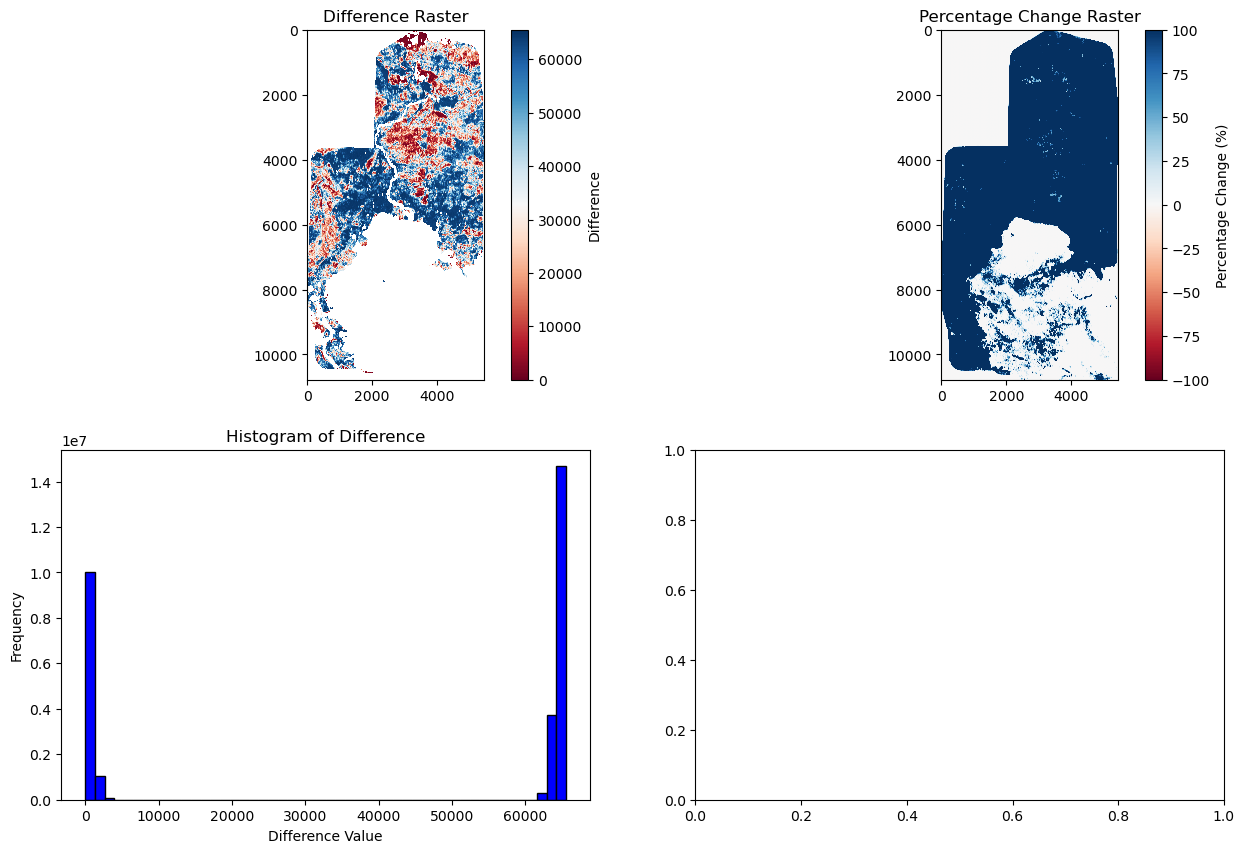

In [33]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Paths to your raster files
raster_path1 = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\image1.tif'
raster_path2 = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\image2.tif'
output_diff_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\Outputfolder\difference.tif'
output_perc_change_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\Outputfolder\percentage_change.tif'

# Open raster files
with rasterio.open(raster_path1) as src1, rasterio.open(raster_path2) as src2:
    data1 = src1.read(1)  # Read the first band from raster 1
    data2 = src2.read(1)  # Read the first band from raster 2
    nodata1 = src1.nodata
    nodata2 = src2.nodata
    transform = src1.transform
    crs = src1.crs

# Mask NoData values in both rasters
if nodata1 is not None:
    data1 = np.ma.masked_equal(data1, nodata1)
if nodata2 is not None:
    data2 = np.ma.masked_equal(data2, nodata2)

# Calculate the difference
difference = data2 - data1

# Calculate the percentage change
with np.errstate(divide='ignore', invalid='ignore'):
    percentage_change = np.where(data1 != 0, ((data2 - data1) / data1) * 100, np.nan)

# Save the difference raster
with rasterio.open(
    output_diff_path, 'w',
    driver='GTiff',
    height=difference.shape[0],
    width=difference.shape[1],
    count=1,
    dtype='float32',
    crs=crs,
    transform=transform
) as dst:
    dst.write(difference, 1)

# Save the percentage change raster
with rasterio.open(
    output_perc_change_path, 'w',
    driver='GTiff',
    height=percentage_change.shape[0],
    width=percentage_change.shape[1],
    count=1,
    dtype='float32',
    crs=crs,
    transform=transform
) as dst:
    dst.write(percentage_change, 1)

# Plot the results
plt.figure(figsize=(15, 10))

# Plot Difference
plt.subplot(2, 2, 1)
plt.imshow(difference, cmap='RdBu', vmin=np.min(difference), vmax=np.max(difference))
plt.colorbar(label='Difference')
plt.title('Difference Raster')

# Plot Percentage Change
plt.subplot(2, 2, 2)
plt.imshow(percentage_change, cmap='RdBu', vmin=-100, vmax=100)
plt.colorbar(label='Percentage Change (%)')
plt.title('Percentage Change Raster')

# Plot histograms
plt.subplot(2, 2, 3)
plt.hist(difference.compressed(), bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Difference')
plt.xlabel('Difference Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(percentage_change.compressed(), bins=50, color='green', edgecolor='black', range=(-100, 100))
plt.title('Histogram of Percentage Change')
plt.xlabel('Percentage Change (%)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


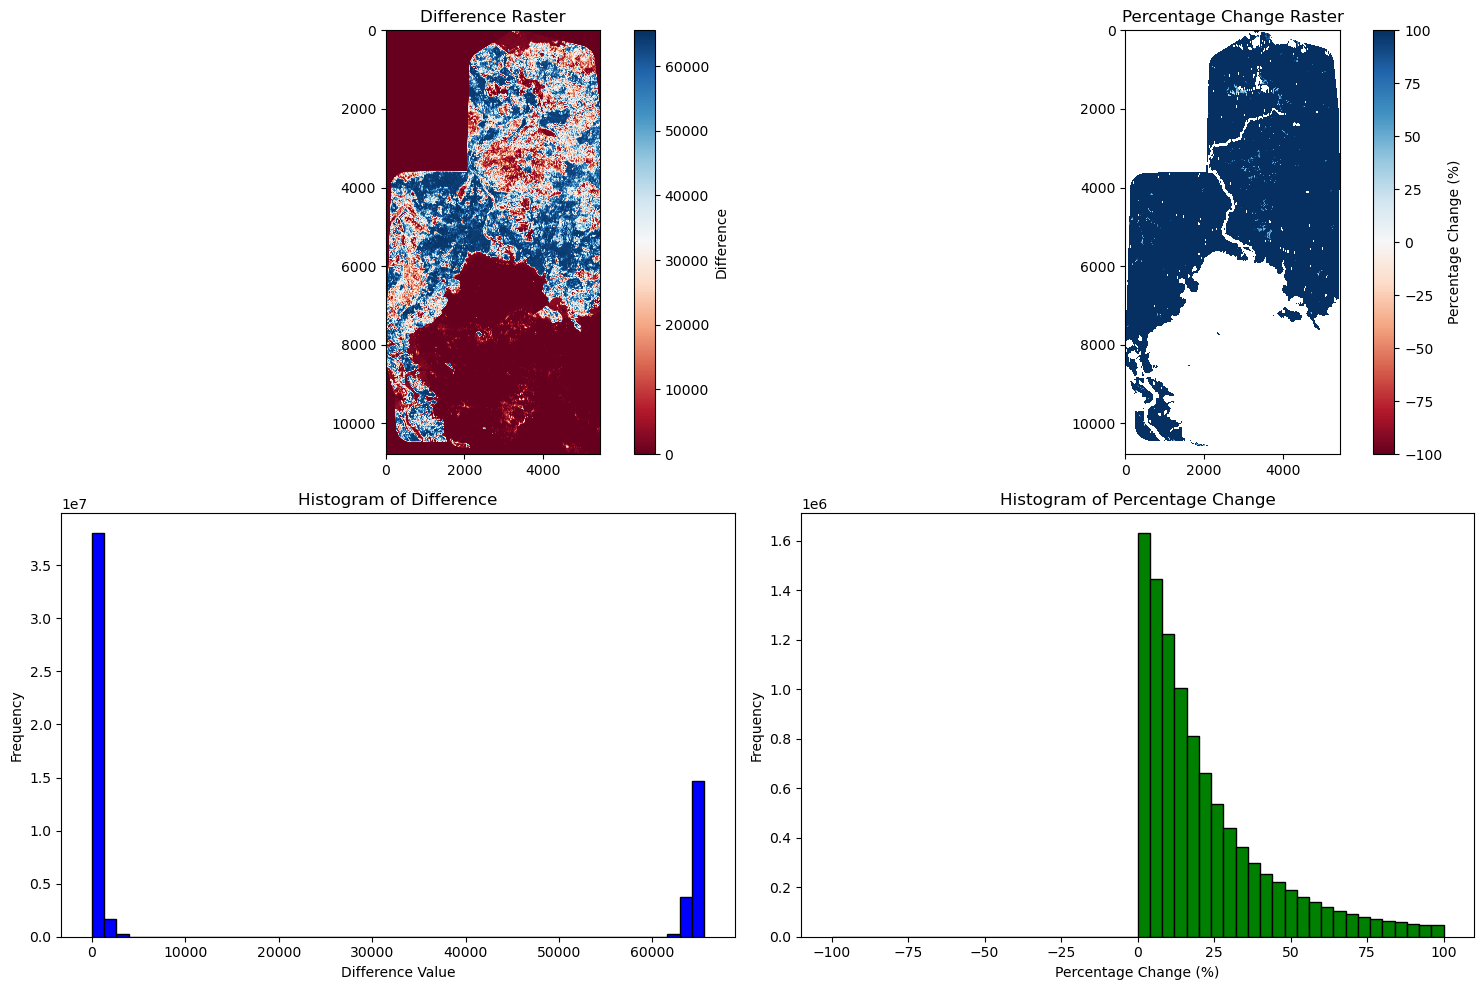

In [34]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Paths to your raster files
raster_path1 = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\image1.tif'
raster_path2 = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\image2.tif'
output_diff_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\Outputfolder\difference.tif'
output_perc_change_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\Outputfolder\percentage_change.tif'

# Open raster files
with rasterio.open(raster_path1) as src1, rasterio.open(raster_path2) as src2:
    data1 = src1.read(1)  # Read the first band from raster 1
    data2 = src2.read(1)  # Read the first band from raster 2
    transform = src1.transform
    crs = src1.crs

# Calculate the difference
difference = data2 - data1

# Calculate the percentage change
with np.errstate(divide='ignore', invalid='ignore'):
    percentage_change = np.where(data1 != 0, ((data2 - data1) / data1) * 100, np.nan)

# Save the difference raster
with rasterio.open(
    output_diff_path, 'w',
    driver='GTiff',
    height=difference.shape[0],
    width=difference.shape[1],
    count=1,
    dtype='float32',
    crs=crs,
    transform=transform
) as dst:
    dst.write(difference, 1)

# Save the percentage change raster
with rasterio.open(
    output_perc_change_path, 'w',
    driver='GTiff',
    height=percentage_change.shape[0],
    width=percentage_change.shape[1],
    count=1,
    dtype='float32',
    crs=crs,
    transform=transform
) as dst:
    dst.write(percentage_change, 1)

# Plot the results
plt.figure(figsize=(15, 10))

# Plot Difference
plt.subplot(2, 2, 1)
plt.imshow(difference, cmap='RdBu', vmin=np.min(difference), vmax=np.max(difference))
plt.colorbar(label='Difference')
plt.title('Difference Raster')

# Plot Percentage Change
plt.subplot(2, 2, 2)
plt.imshow(percentage_change, cmap='RdBu', vmin=-100, vmax=100)
plt.colorbar(label='Percentage Change (%)')
plt.title('Percentage Change Raster')

# Plot histograms
plt.subplot(2, 2, 3)
plt.hist(difference.flatten(), bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Difference')
plt.xlabel('Difference Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(percentage_change.flatten(), bins=50, color='green', edgecolor='black', range=(-100, 100))
plt.title('Histogram of Percentage Change')
plt.xlabel('Percentage Change (%)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Raster 1 - Min: 0.0, Max: 9979.0
Raster 2 - Min: 0.0, Max: 9910.0
Difference - Min: -7789.0, Max: 8899.0
Percentage Change - Min: -100.0, Max: 319800.0


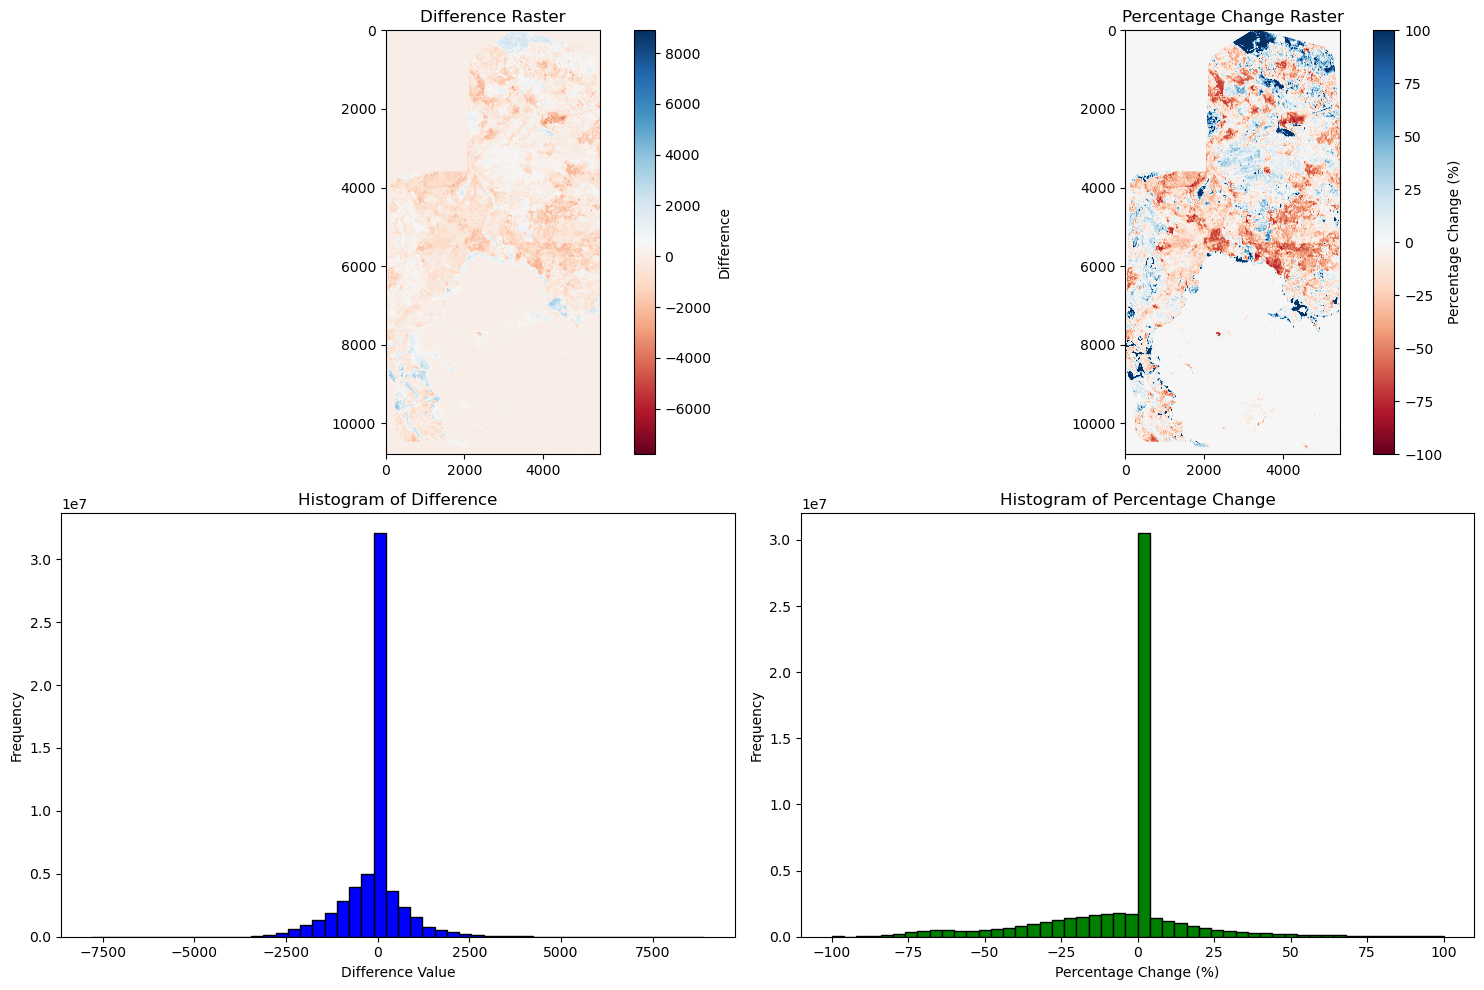

In [35]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Paths to your raster files
raster_path1 = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\image1.tif'
raster_path2 = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\image2.tif'
output_diff_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\Outputfolder\difference.tif'
output_perc_change_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\Outputfolder\percentage_change.tif'

# Open raster files
with rasterio.open(raster_path1) as src1, rasterio.open(raster_path2) as src2:
    data1 = src1.read(1).astype(np.float32)  # Read the first band from raster 1 as float32
    data2 = src2.read(1).astype(np.float32)  # Read the first band from raster 2 as float32
    transform = src1.transform
    crs = src1.crs

# Print min and max values for debugging
print(f"Raster 1 - Min: {np.min(data1)}, Max: {np.max(data1)}")
print(f"Raster 2 - Min: {np.min(data2)}, Max: {np.max(data2)}")

# Calculate the difference
difference = data2 - data1

# Calculate the percentage change, handling zero division
with np.errstate(divide='ignore', invalid='ignore'):
    percentage_change = np.where(data1 != 0, ((data2 - data1) / data1) * 100, np.nan)
    # Ensure no NaNs for visualization
    percentage_change[np.isnan(percentage_change)] = 0

# Print min and max values of the results for debugging
print(f"Difference - Min: {np.min(difference)}, Max: {np.max(difference)}")
print(f"Percentage Change - Min: {np.min(percentage_change)}, Max: {np.max(percentage_change)}")

# Save the difference raster
with rasterio.open(
    output_diff_path, 'w',
    driver='GTiff',
    height=difference.shape[0],
    width=difference.shape[1],
    count=1,
    dtype='float32',
    crs=crs,
    transform=transform
) as dst:
    dst.write(difference, 1)

# Save the percentage change raster
with rasterio.open(
    output_perc_change_path, 'w',
    driver='GTiff',
    height=percentage_change.shape[0],
    width=percentage_change.shape[1],
    count=1,
    dtype='float32',
    crs=crs,
    transform=transform
) as dst:
    dst.write(percentage_change, 1)

# Plot the results
plt.figure(figsize=(15, 10))

# Plot Difference
plt.subplot(2, 2, 1)
plt.imshow(difference, cmap='RdBu', vmin=np.min(difference), vmax=np.max(difference))
plt.colorbar(label='Difference')
plt.title('Difference Raster')

# Plot Percentage Change
plt.subplot(2, 2, 2)
plt.imshow(percentage_change, cmap='RdBu', vmin=-100, vmax=100)
plt.colorbar(label='Percentage Change (%)')
plt.title('Percentage Change Raster')

# Plot histograms
plt.subplot(2, 2, 3)
plt.hist(difference.flatten(), bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Difference')
plt.xlabel('Difference Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(percentage_change.flatten(), bins=50, color='green', edgecolor='black', range=(-100, 100))
plt.title('Histogram of Percentage Change')
plt.xlabel('Percentage Change (%)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


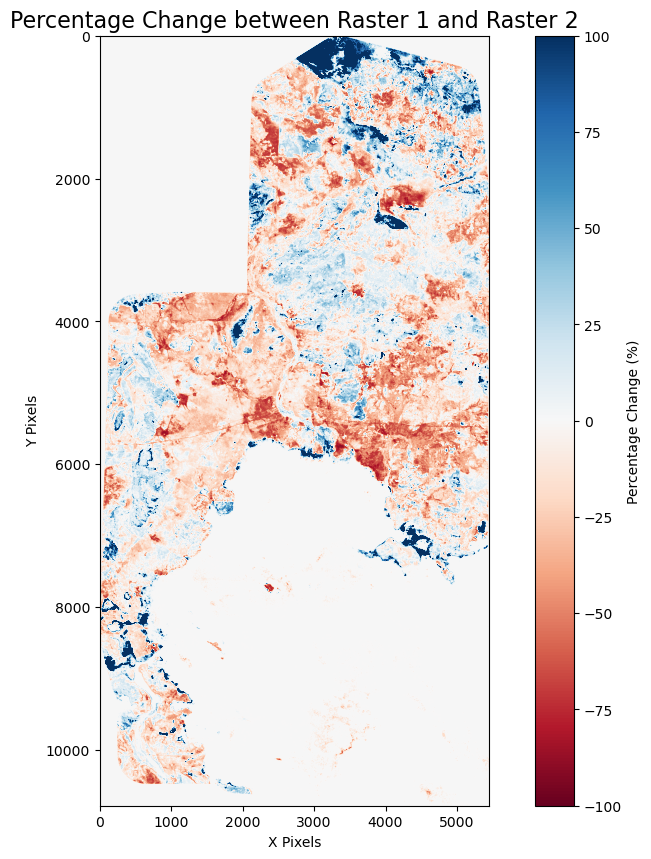

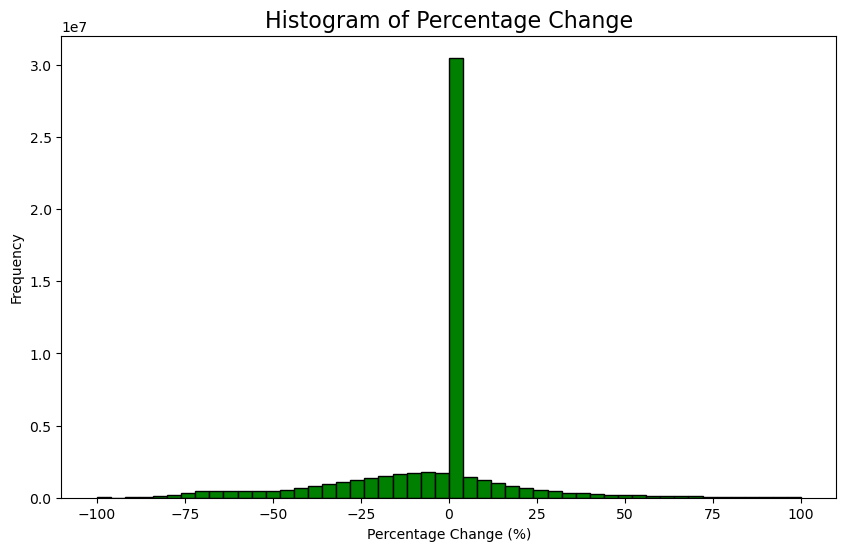

In [38]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Paths to your raster files
raster_path1 = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\image1.tif'
raster_path2 = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\image2.tif'
output_diff_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\Outputfolder1\difference.tif'
output_perc_change_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\Outputfolder1\percentage_change.tif'

# Open raster files
with rasterio.open(raster_path1) as src1, rasterio.open(raster_path2) as src2:
    data1 = src1.read(1).astype(np.float32)  # Read the first band from raster 1 as float32
    data2 = src2.read(1).astype(np.float32)  # Read the first band from raster 2 as float32
    transform = src1.transform
    crs = src1.crs

# Calculate the difference
difference = data2 - data1

# Calculate the percentage change
with np.errstate(divide='ignore', invalid='ignore'):
    percentage_change = np.where(data1 != 0, ((data2 - data1) / data1) * 100, np.nan)
    percentage_change[np.isnan(percentage_change)] = 0  # Replace NaNs with 0 for plotting

# Save the percentage change raster (optional step)
with rasterio.open(
    output_perc_change_path, 'w',
    driver='GTiff',
    height=percentage_change.shape[0],
    width=percentage_change.shape[1],
    count=1,
    dtype='float32',
    crs=crs,
    transform=transform
) as dst:
    dst.write(percentage_change, 1)

# Enlarged plot for Percentage Change
plt.figure(figsize=(12, 10))  # Increased size for the percentage change plot
plt.imshow(percentage_change, cmap='RdBu', vmin=-100, vmax=100)
plt.colorbar(label='Percentage Change (%)')
plt.title('Percentage Change between Raster 1 and Raster 2', fontsize=16)
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.show()

# Histogram of Percentage Change
plt.figure(figsize=(10, 6))  # Increased size for histogram
plt.hist(percentage_change.flatten(), bins=50, color='green', edgecolor='black', range=(-100, 100))
plt.title('Histogram of Percentage Change', fontsize=16)
plt.xlabel('Percentage Change (%)')
plt.ylabel('Frequency')
plt.show()


Raster 1 - Min: 0.0, Max: 9979.0
Raster 2 - Min: 0.0, Max: 9910.0
Difference - Min: -7789.0, Max: 8899.0
Percentage Change - Min: -100.0, Max: 319800.0


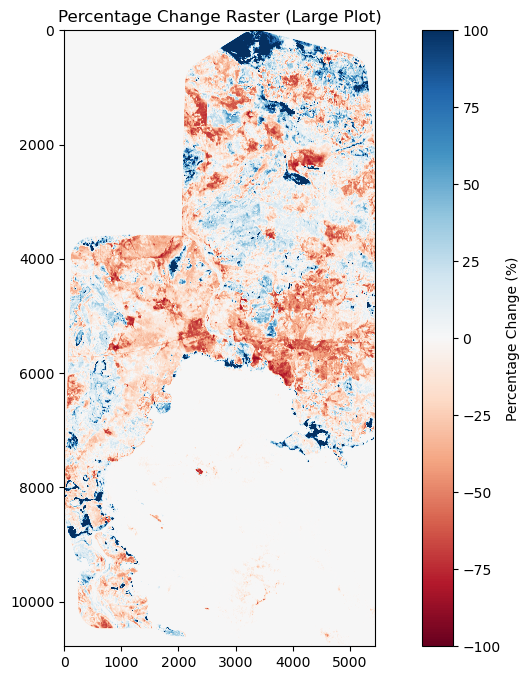

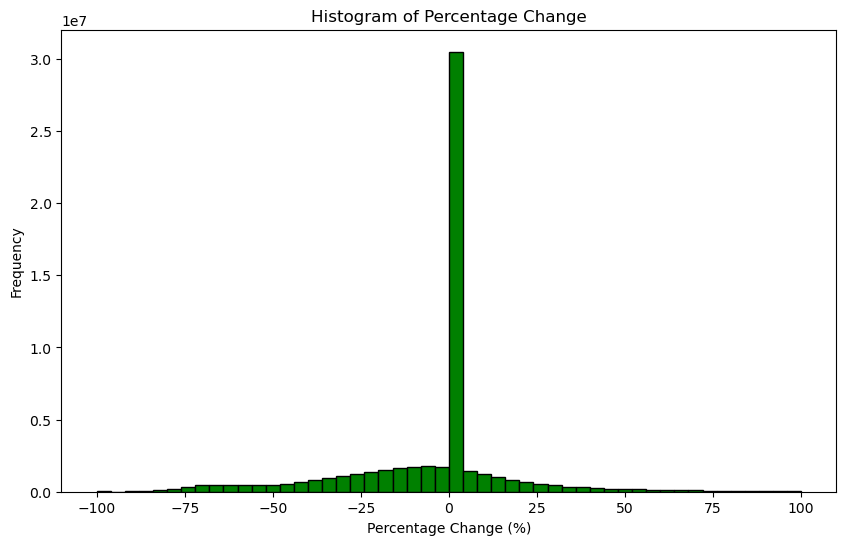

In [39]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Paths to your raster files
raster_path1 = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\image1.tif'
raster_path2 = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\image2.tif'
output_diff_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\Outputfolder2\difference.tif'
output_perc_change_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\Outputfolder2\percentage_change.tif'

# Open raster files
with rasterio.open(raster_path1) as src1, rasterio.open(raster_path2) as src2:
    data1 = src1.read(1).astype(np.float32)  # Read the first band from raster 1 as float32
    data2 = src2.read(1).astype(np.float32)  # Read the first band from raster 2 as float32
    transform = src1.transform
    crs = src1.crs

# Print min and max values for debugging
print(f"Raster 1 - Min: {np.min(data1)}, Max: {np.max(data1)}")
print(f"Raster 2 - Min: {np.min(data2)}, Max: {np.max(data2)}")

# Calculate the difference
difference = data2 - data1

# Calculate the percentage change, handling zero division
with np.errstate(divide='ignore', invalid='ignore'):
    percentage_change = np.where(data1 != 0, ((data2 - data1) / data1) * 100, np.nan)
    # Ensure no NaNs for visualization
    percentage_change[np.isnan(percentage_change)] = 0

# Print min and max values of the results for debugging
print(f"Difference - Min: {np.min(difference)}, Max: {np.max(difference)}")
print(f"Percentage Change - Min: {np.min(percentage_change)}, Max: {np.max(percentage_change)}")

# Save the percentage change raster
with rasterio.open(
    output_perc_change_path, 'w',
    driver='GTiff',
    height=percentage_change.shape[0],
    width=percentage_change.shape[1],
    count=1,
    dtype='float32',
    crs=crs,
    transform=transform
) as dst:
    dst.write(percentage_change, 1)

# Plot Percentage Change with larger size
plt.figure(figsize=(12, 8))  # Set the figure size larger

# Plot Percentage Change Raster
plt.imshow(percentage_change, cmap='RdBu', vmin=-100, vmax=100)
plt.colorbar(label='Percentage Change (%)')
plt.title('Percentage Change Raster (Large Plot)')

# Show the plot
plt.show()

# Plot Histogram for Percentage Change
plt.figure(figsize=(10, 6))
plt.hist(percentage_change.flatten(), bins=50, color='green', edgecolor='black', range=(-100, 100))
plt.title('Histogram of Percentage Change')
plt.xlabel('Percentage Change (%)')
plt.ylabel('Frequency')
plt.show()


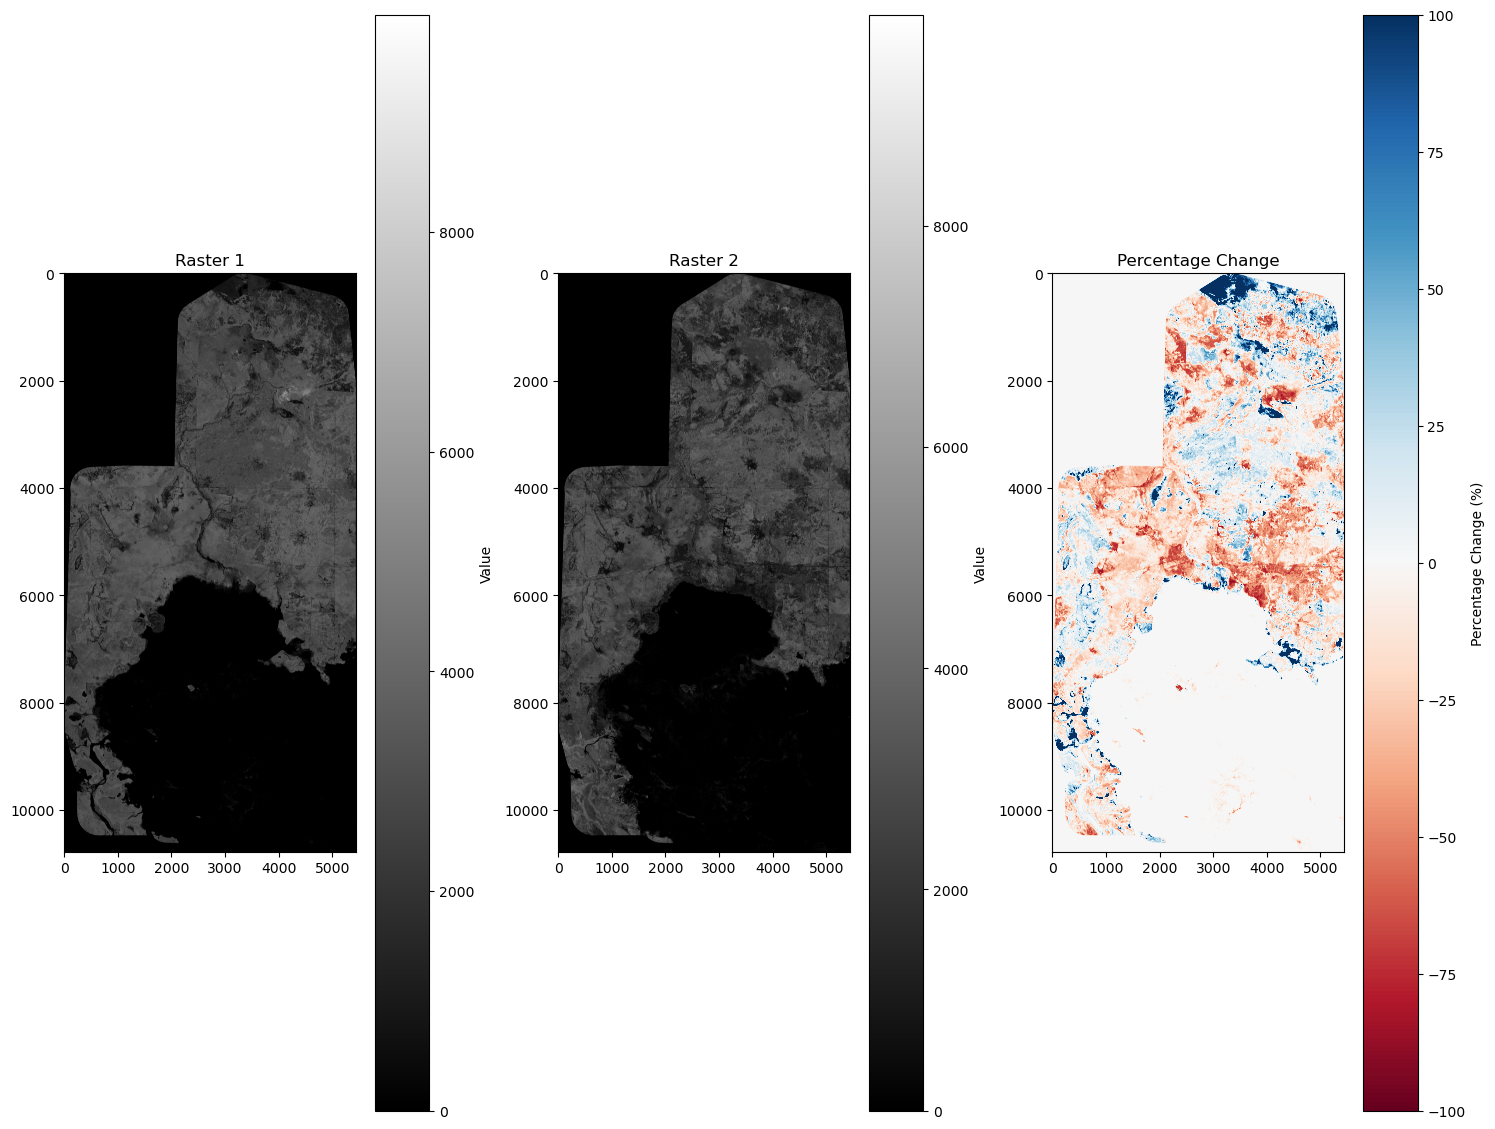

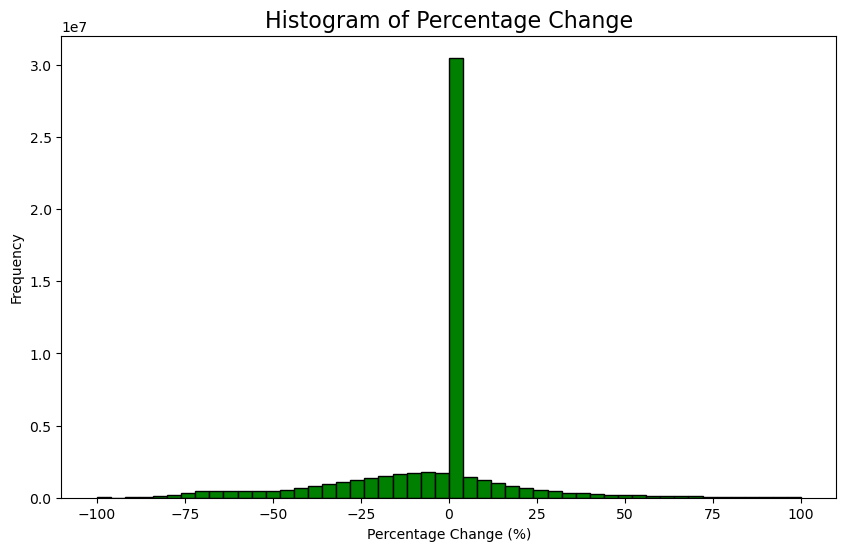

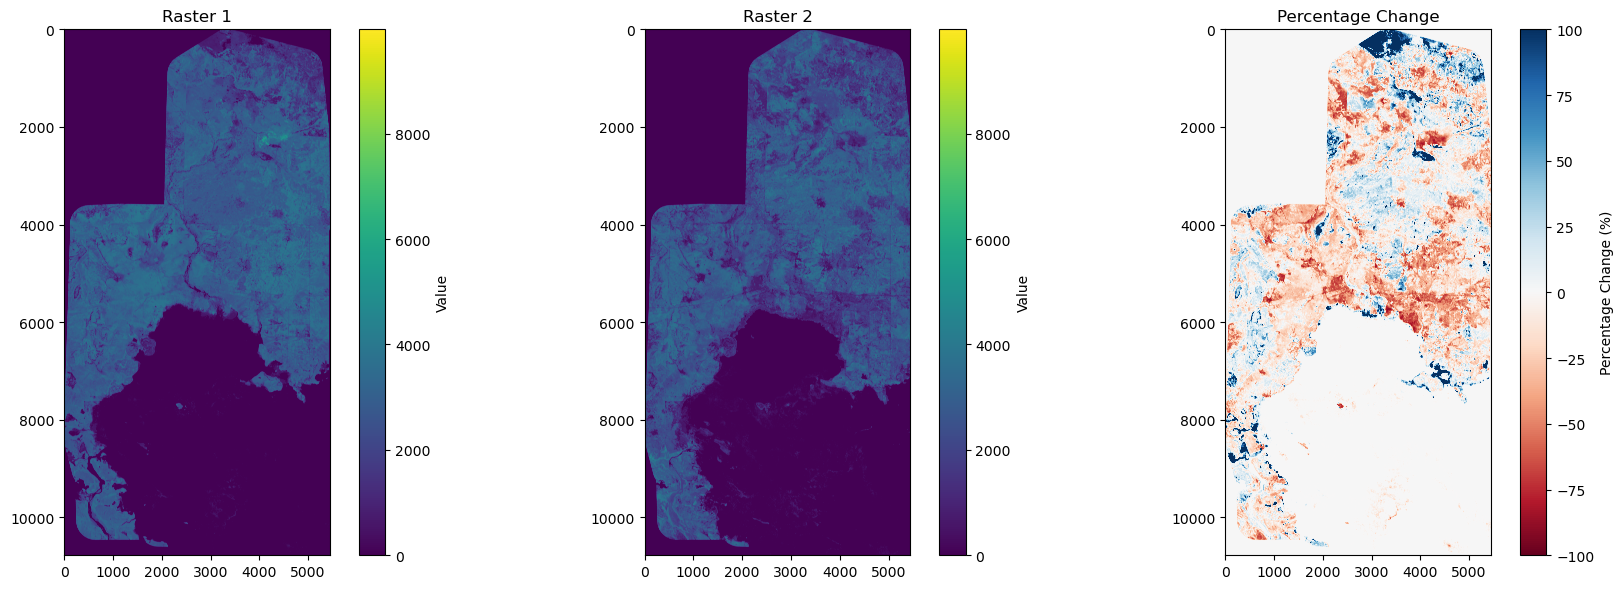

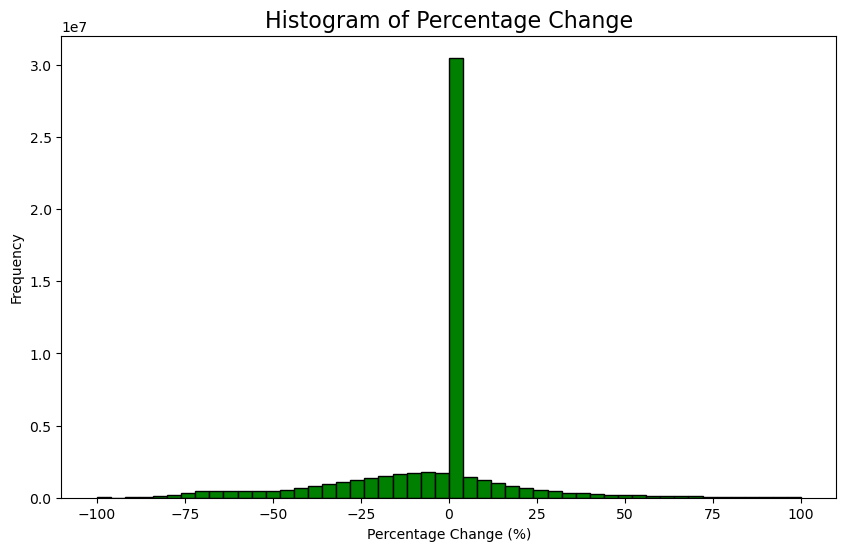

In [42]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Paths to your raster files
raster_path1 = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\image1.tif'
raster_path2 = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\image2.tif'
output_perc_change_path = r'C:\Users\FIqbal\Downloads\TSDM_May_August\TSDM difference\Outputfolder2\percentage_change.tif'

# Open raster files
with rasterio.open(raster_path1) as src1, rasterio.open(raster_path2) as src2:
    data1 = src1.read(1).astype(np.float32)  # Read the first band from raster 1 as float32
    data2 = src2.read(1).astype(np.float32)  # Read the first band from raster 2 as float32
    transform = src1.transform
    crs = src1.crs

# Calculate the difference
difference = data2 - data1

# Calculate the percentage change
with np.errstate(divide='ignore', invalid='ignore'):
    percentage_change = np.where(data1 != 0, ((data2 - data1) / data1) * 100, np.nan)
    percentage_change[np.isnan(percentage_change)] = 0  # Replace NaNs with 0 for plotting

# Save the percentage change raster (optional step)
with rasterio.open(
    output_perc_change_path, 'w',
    driver='GTiff',
    height=percentage_change.shape[0],
    width=percentage_change.shape[1],
    count=1,
    dtype='float32',
    crs=crs,
    transform=transform
) as dst:
    dst.write(percentage_change, 1)

# Find global min and max values for consistent color mapping
min_value = min(np.min(data1), np.min(data2))
max_value = max(np.max(data1), np.max(data2))

# Plotting all images
plt.figure(figsize=(18, 6))

# Plot Raster 1
plt.subplot(1, 3, 1)
plt.imshow(data1, cmap='viridis', vmin=min_value, vmax=max_value)
plt.colorbar(label='Value')
plt.title('Raster 1')

# Plot Raster 2
plt.subplot(1, 3, 2)
plt.imshow(data2, cmap='viridis', vmin=min_value, vmax=max_value)
plt.colorbar(label='Value')
plt.title('Raster 2')

# Plot Percentage Change
plt.subplot(1, 3, 3)
plt.imshow(percentage_change, cmap='RdBu', vmin=-100, vmax=100)
plt.colorbar(label='Percentage Change (%)')
plt.title('Percentage Change')

plt.tight_layout()
plt.show()

# Histogram of Percentage Change
plt.figure(figsize=(10, 6))
plt.hist(percentage_change.flatten(), bins=50, color='green', edgecolor='black', range=(-100, 100))
plt.title('Histogram of Percentage Change', fontsize=16)
plt.xlabel('Percentage Change (%)')
plt.ylabel('Frequency')
plt.show()
